(960, 1920, 3)


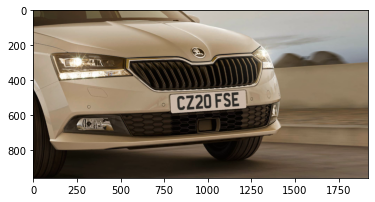

In [16]:
import cv2
import imutils
import numpy as np
import pytesseract
#import tesseract
from matplotlib import pyplot as plt
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
img = cv2.imread("image.jpg")
print(img.shape)
plt.imshow(img,cmap='gray')
plt.show()


(480, 620)


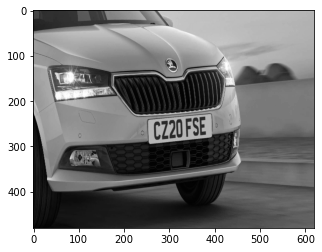

In [30]:
img1 = cv2.resize(img, (620,480) )
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
print(gray.shape)
plt.imshow(gray,cmap=plt.get_cmap('gray'))
plt.show()

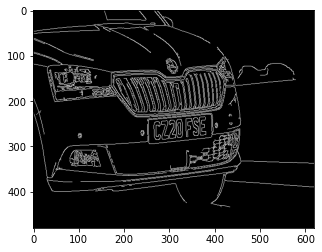

In [31]:
gray1 = cv2.bilateralFilter(gray, 13, 15, 15)
edged = cv2.Canny(gray1, 30, 200)
edged1=edged.copy()
plt.imshow(edged,cmap=plt.get_cmap('gray'))
plt.show()

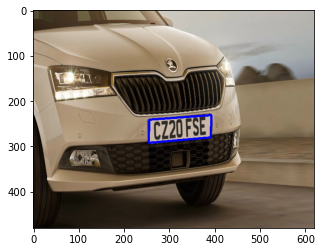

In [19]:
contours=cv2.findContours(edged1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours1 = imutils.grab_contours(contours)
contours2 = sorted(contours1,key=cv2.contourArea, reverse = True)[:10]
screenCnt = None

for c in contours2:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
    # if our approximated contour has four points, then
    # we can assume that we have found our screen
    if len(approx) == 4:
        screenCnt = approx
        break


new_image = cv2.drawContours(img1, [screenCnt], -1, (0, 0, 255), 3)
plt.imshow(new_image)
plt.show()

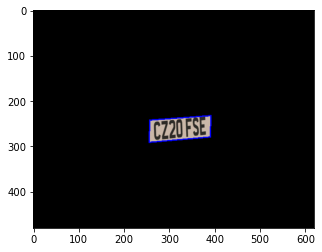

In [20]:
# Masking the part other than the number plate
mask = np.zeros(gray.shape,np.uint8)
new_image1 = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image2 = cv2.bitwise_and(img1,img1,mask=mask)
plt.imshow(new_image2)
plt.show()

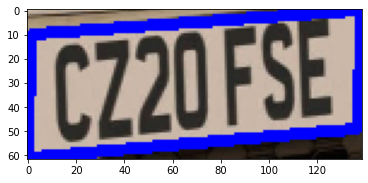

In [21]:
# Now crop
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
cropped = img1[topx:bottomx+1, topy:bottomy+1]
plt.imshow(cropped)
plt.show()

In [22]:
#Read the number plate
text = pytesseract.image_to_string(cropped, config='--psm 11')
print("Detected license plate Number is:",text)


Detected license plate Number is: CZ20F St



In [26]:
print(text[::-1])


tS F02ZC
